https://nbviewer.jupyter.org/format/slides/github/quantopian/pyfolio/blob/master/pyfolio/examples/pyfolio_talk_slides.ipynb

In [6]:
import pandas as pd
from QUANTAXIS import QA_fetch_stock_day_adv
from QUANTAXIS import QA_fetch_index_day_adv
import ploter
import talib
import numpy as np
import quantaxis_ext
import settings
import units
import header
import calculator as calc
import matplotlib.pyplot as plt

import pyfolio as pf

#设定绘图的默认大小
import matplotlib
matplotlib.rcParams["figure.figsize"]=[16,5]

#加载 seaborn，并且设置默认使用 seaborn
import seaborn as sns
sns.set()

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Noto Sans CJK SC','SimHei']
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [7]:
START_VALS = 1000000 # 初始投资总额
START = '2018-01-01' # 初始投资日期
END = '2018-12-31' # 结束投资日期
# 投资组合：贵州茅台、中国平安、招商银行、格力电器
SYMBOLS = ['600519','601318','600036','000651'] 
# 比率分配
ALLOCS = [0.4,0.4,0.1,0.1]

def _test_index(code):
    """测试指数数据是否在本地能读取到
    
    Return:
        如果数据读取正常，则返回True，否则返回False
    """
    return not QA_fetch_index_day_adv(code,START,END).data.empty

ZS_CODE=['000300','399300']#指数代码。沪深300
for z in ZS_CODE:
    if _test_index(z):
        ZS_CODE=z
        break
if not isinstance(ZS_CODE, str):
    raise AssertionError
print(ZS_CODE)

399300


In [8]:
daily_adv=quantaxis_ext.fetch_index_stock_daily_adv(SYMBOLS, ZS_CODE, START, END)
daily_rets=daily_adv.pct_change()[1:]

## 指数日回报率

In [9]:
zs_rets=daily_rets[['zs_'+ZS_CODE]]
zs_rets.head()

,zs_399300
date,
2018-01-03,0.005869
2018-01-04,0.004237
2018-01-05,0.002407
2018-01-08,0.005173
2018-01-09,0.007005


## 组合的日回报率

In [10]:
stock_rets=daily_rets.drop(columns=['zs_'+ZS_CODE])
stock_rets.head()

,600519,601318,600036,000651
date,,,,
2018-01-03,0.017063,-0.022317,0.011816,0.011074
2018-01-04,0.029629,0.002959,-0.010677,0.020372
2018-01-05,0.001750,-0.004074,0.015177,0.027909
2018-01-08,0.018649,-0.012414,-0.020930,-0.001044
2018-01-09,0.040405,0.026568,0.010180,0.032825


## 显示完整指标

Start date,2018-01-03
End date,2018-12-28
Total months,11
,Backtest
Annual return,-16.8%
Cumulative returns,-16.2%
Annual volatility,35.7%
Sharpe ratio,-0.34
Calmar ratio,-0.49
Stability,0.60
Max drawdown,-34.4%


C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance_36\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.43,2018-06-12,2018-10-30,NaT,NaN
1,16.84,2018-01-12,2018-04-18,2018-06-12,108
2,1.39,2018-01-10,2018-01-11,2018-01-12,3
3,0.00,2018-01-03,2018-01-03,2018-01-03,1
4,0.00,2018-01-03,2018-01-03,2018-01-03,1


IndexError: invalid index

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance_36\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


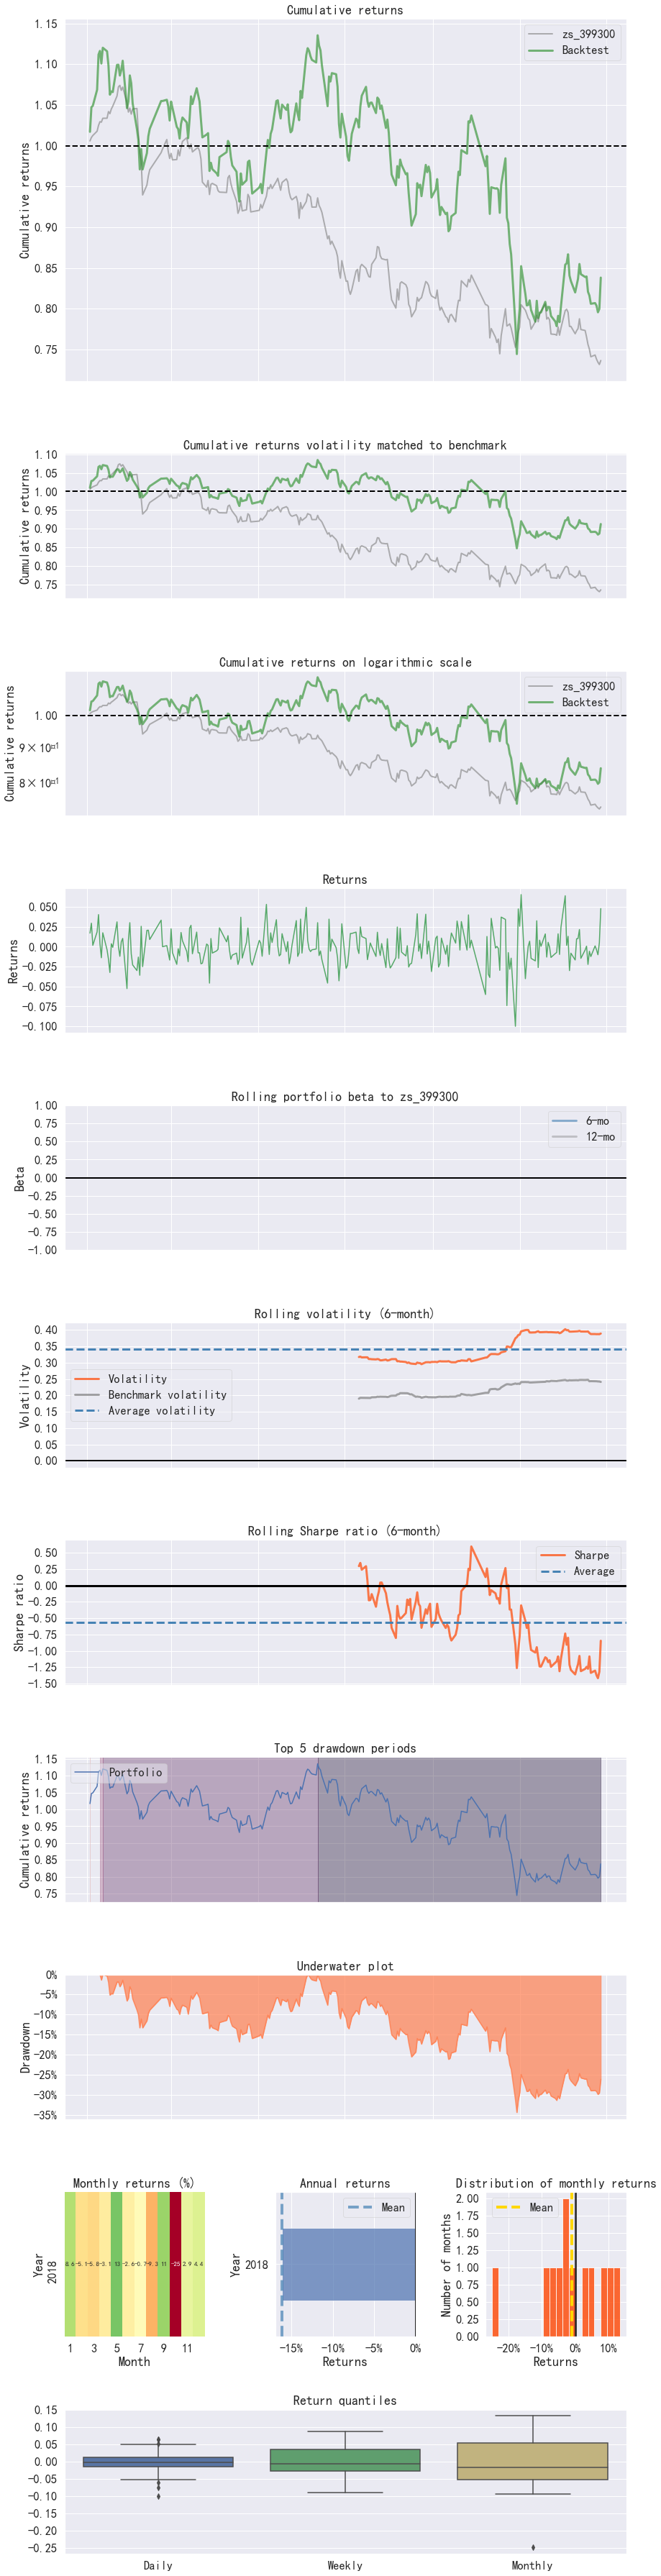

In [11]:
pf.create_full_tear_sheet(daily_rets[SYMBOLS[0]],benchmark_rets=daily_rets['zs_'+ZS_CODE])

## 显示简单指标 

Start date,2018-01-03
End date,2018-12-28
Total months,11
,Backtest
Annual return,-16.8%
Cumulative returns,-16.2%
Annual volatility,35.7%
Sharpe ratio,-0.34
Calmar ratio,-0.49
Stability,0.60
Max drawdown,-34.4%


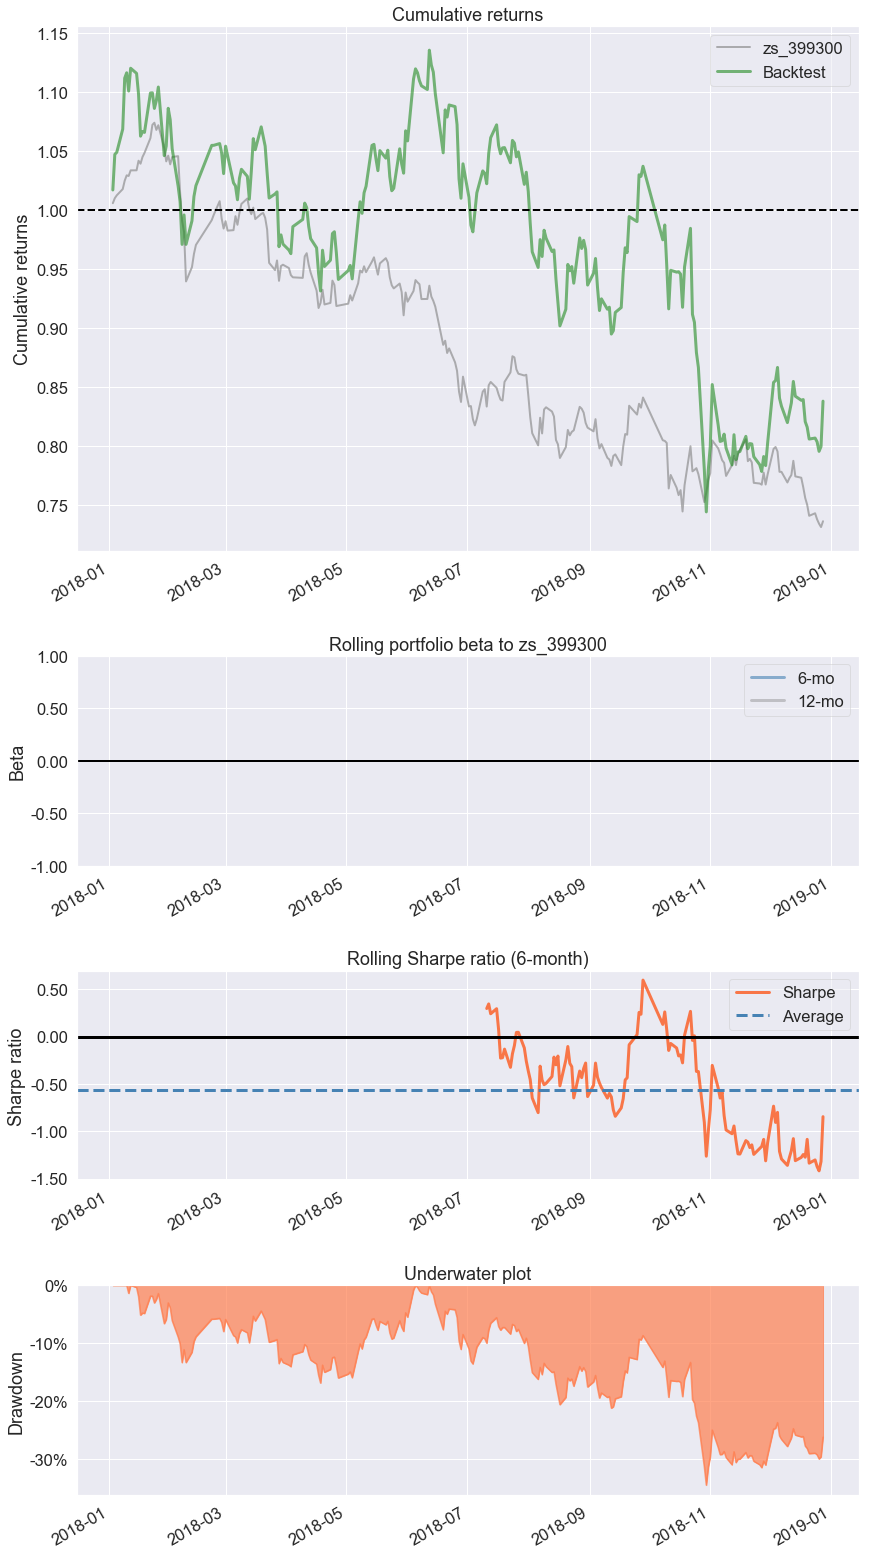

In [12]:
pf.create_simple_tear_sheet(daily_rets[SYMBOLS[0]],benchmark_rets=daily_rets['zs_'+ZS_CODE])